In [2]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
import os
import sqlite3

conn = sqlite3.connect(os.path.join("..", "db.sqlite3"))
sql_query = ("""
    SELECT *
    FROM restaurant_orderitem
    INNER JOIN restaurant_order
    ON restaurant_orderitem.order_id = restaurant_order.id
    INNER JOIN restaurant_product
    ON restaurant_orderitem.product_id = restaurant_product.id;
""")

restaurant_df = pd.read_sql(sql_query, conn)
conn.close()

restaurant_df.to_csv("restaurant_orderitems.csv", index=False)

restaurant_df.head()

,id,quantity,order_id,product_id,id,datetime,id,price,name
0,1,2,1,6,1,2019-08-03 20:25:00,6,0.80,Plain Papadum
1,2,1,1,240,1,2019-08-03 20:25:00,240,12.95,King Prawn Balti
2,3,1,1,19,1,2019-08-03 20:25:00,19,2.95,Garlic Naan
3,4,1,1,36,1,2019-08-03 20:25:00,36,3.95,Mushroom Rice
4,5,1,1,111,1,2019-08-03 20:25:00,111,8.95,Paneer Tikka Masala


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

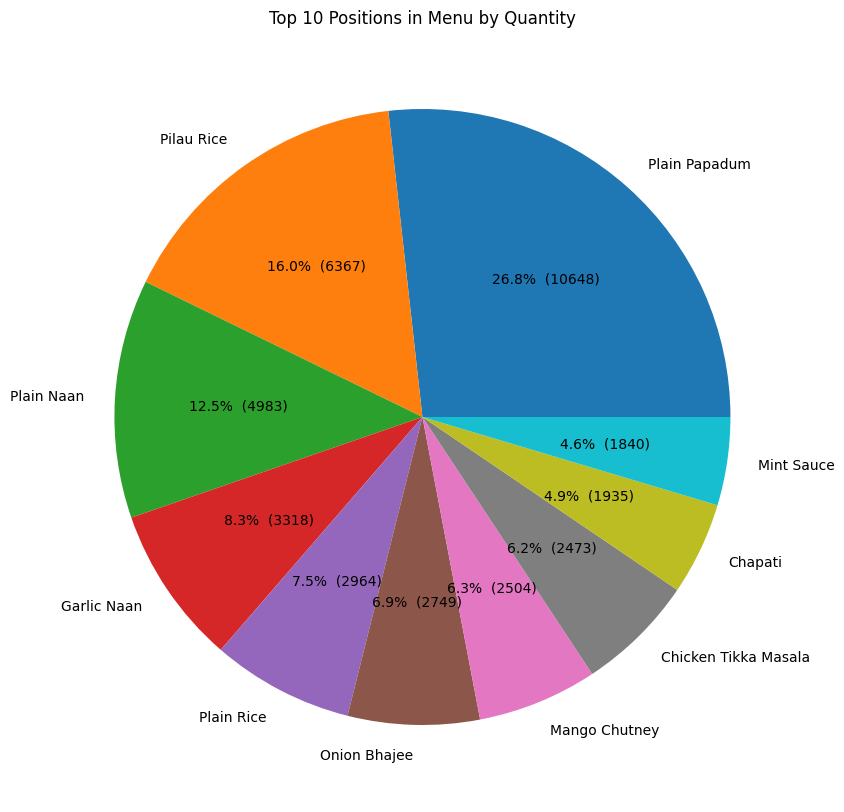

In [58]:
import matplotlib.pyplot as plt

product_stats = restaurant_df.groupby("name")["quantity"].sum()
top_10_products = product_stats.nlargest(10)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f"{pct:.1f}%  ({val:d})"
    return my_autopct

def generate_pie_chart(values: pd.Series):
    plt.figure(figsize=(10,10))
    plt.pie(values, labels=values.index, autopct=make_autopct(values))
    plt.title("Top 10 Positions in Menu by Quantity")
    plt.show()

generate_pie_chart(top_10_products)


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

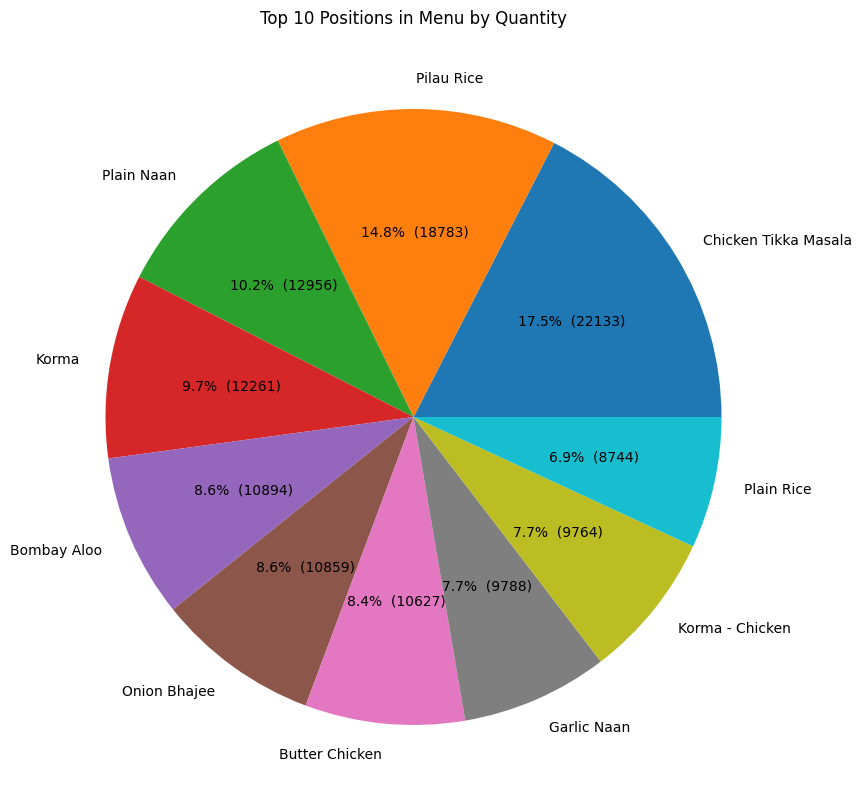

In [59]:
restaurant_df["item_price"] = restaurant_df["price"] * restaurant_df["quantity"]
product_revenue = restaurant_df.groupby("name")["item_price"].sum()
top_10_revenue_products = product_revenue.nlargest(10)

generate_pie_chart(top_10_revenue_products)

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

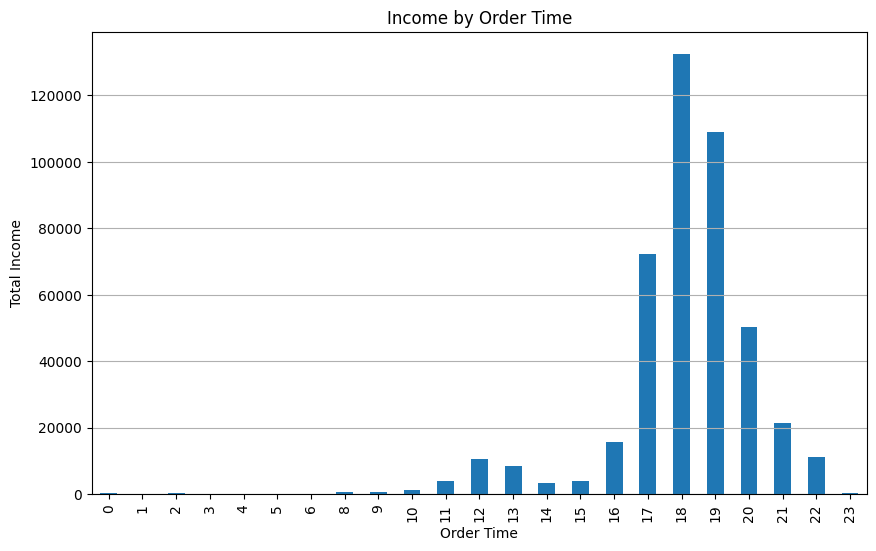

In [84]:
restaurant_df["datetime"] = pd.to_datetime(restaurant_df["datetime"])
restaurant_df["order_hour"] = restaurant_df["datetime"].dt.hour
hourly_income = restaurant_df.groupby("order_hour")["item_price"].sum()

def generate_bar_chart(values: pd.Series):
    plt.figure(figsize=(10, 6))
    values.plot(kind="bar")
    
    plt.title("Income by Order Time")
    plt.xlabel("Order Time")
    plt.ylabel("Total Income")
    plt.grid(axis="y")
    
    plt.show()

generate_bar_chart(hourly_income)

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

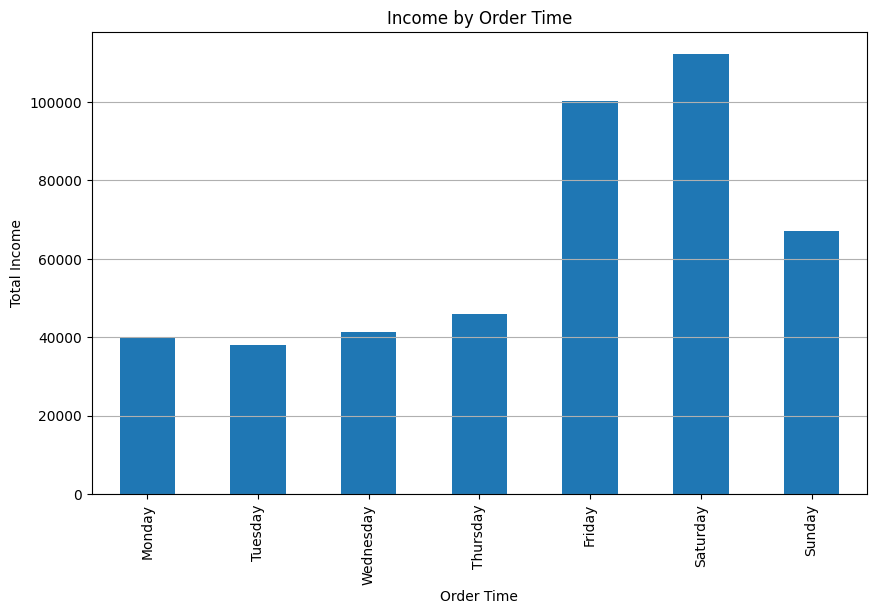

In [85]:
restaurant_df["order_week_day"] = restaurant_df["datetime"].dt.dayofweek
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

daily_income = restaurant_df.groupby("order_week_day")["item_price"].sum()
daily_income.index = days

generate_bar_chart(daily_income)